<a href="https://colab.research.google.com/github/deejayprof/Adejumo-Samson-ssbc/blob/master/Metal_Samson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.pyplot import figure, show, cm

import pandas as pd
import numpy as np
import itertools as it
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
import re
import scipy.cluster.hierarchy as sch

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
mpl.rc('pdf', fonttype=42)
import seaborn as sns

import random

from collections import Counter
import operator

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

In [ ]:
mydataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

sam = pd.DataFrame(mydataset)

print(sam)

In [ ]:
#To import a url
import urllib.request
get_url= urllib.request.urlopen('https://www.uic.edu')
print ( "Response Status: " + str (get_url.getcode()))

   Oil_Price  GDP_growth
0       1500         6.1
1       1520         5.8
2       1525         5.7
3       1523         5.7
4       1515         5.8
5       1540         5.6
6       1545         5.5
7       1560         5.3
8       1555         5.2
9       1565         5.2


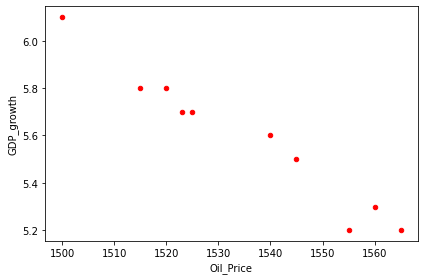

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
gdp_cal= pd.DataFrame({
    'GDP_growth': [6.1, 5.8, 5.7, 5.7, 5.8, 5.6, 5.5, 5.3, 5.2, 5.2],
    'Oil_Price': [1500, 1520, 1525, 1523, 1515, 1540, 1545, 1560, 1555, 1565]
})
df = pd.DataFrame(gdp_cal, columns=['Oil_Price', 'GDP_growth'])
print(df)
df.plot(x='Oil_Price', y='GDP_growth', kind = 'scatter', color= 'red')
plt.show()

In [21]:
import pandas as pd
df = pd.read_csv(r'C:/Users/Test/Documents/HEK293_EDTA_plus_SEC_treatment_20220626.csv')
print (df)

FileNotFoundError: ignored